# Digimon Dataset Analysis
## Objective
Analyze Digimon stats, moves, and team composition strategies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

digimon = pd.read_csv('DigiDB_digimonlist.csv')
moves = pd.read_csv('DigiDB_movelist.csv')
support = pd.read_csv('DigiDB_supportlist.csv')

## Data Exploration

In [3]:
print("Digimon Columns:", digimon.columns.tolist())
print("Move Columns:", moves.columns.tolist())

Digimon Columns: ['Number', 'Digimon', 'Stage', 'Type', 'Attribute', 'Memory', 'Equip Slots', 'Lv 50 HP', 'Lv50 SP', 'Lv50 Atk', 'Lv50 Def', 'Lv50 Int', 'Lv50 Spd']
Move Columns: ['Move', 'SP Cost', 'Type', 'Power', 'Attribute', 'Inheritable', 'Description']


## Data Cleaning

In [4]:
digimon['Attribute'] = digimon['Attribute'].replace({'Thunder': 'Electric'})
moves['Attribute'] = moves['Attribute'].replace({'Thunder': 'Electric'})

## Analysis
### a) Best Attack/SP Ratio

In [5]:
damage_moves = moves[moves['Power'] > 0]
damage_moves['Power/SP'] = damage_moves['Power'] / damage_moves['SP Cost']
top_moves = damage_moves.nlargest(5, 'Power/SP')
display(top_moves[['Move', 'SP Cost', 'Power', 'Power/SP']])

C:\Users\norma\AppData\Local\Temp\ipykernel_26924\1217834357.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  damage_moves['Power/SP'] = damage_moves['Power'] / damage_moves['SP Cost']


,Move,SP Cost,Power,Power/SP
80,Heavy Strike I,3,70,23.333333
0,Wolkenapalm I,3,65,21.666667
10,Ice Archery I,3,65,21.666667
20,Crescent Leaf I,3,65,21.666667
30,Nanomachine Break I,3,65,21.666667


### b) Top 3 Digimon by Stats

In [6]:
print("Top Attackers:")
display(digimon.nlargest(3, 'Lv50 Atk')[['Digimon', 'Stage', 'Lv50 Atk']])
print("\nTop Defenders:")
display(digimon.nlargest(3, 'Lv50 Def')[['Digimon', 'Stage', 'Lv50 Def']])

Top Attackers:


,Digimon,Stage,Lv50 Atk
243,Chaosmon,Ultra,318
235,Belphemon RM,Ultra,247
195,Diaboromon,Mega,243



Top Defenders:


,Digimon,Stage,Lv50 Def
181,GroundLocomon,Mega,213
182,Craniamon,Mega,208
238,Magnamon,Armor,208


### c) HP vs SP Tradeoff

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=digimon, x='Lv50 HP', y='Lv50 SP')
plt.title('HP vs SP Relationship')
plt.show()

### d) Type Representation

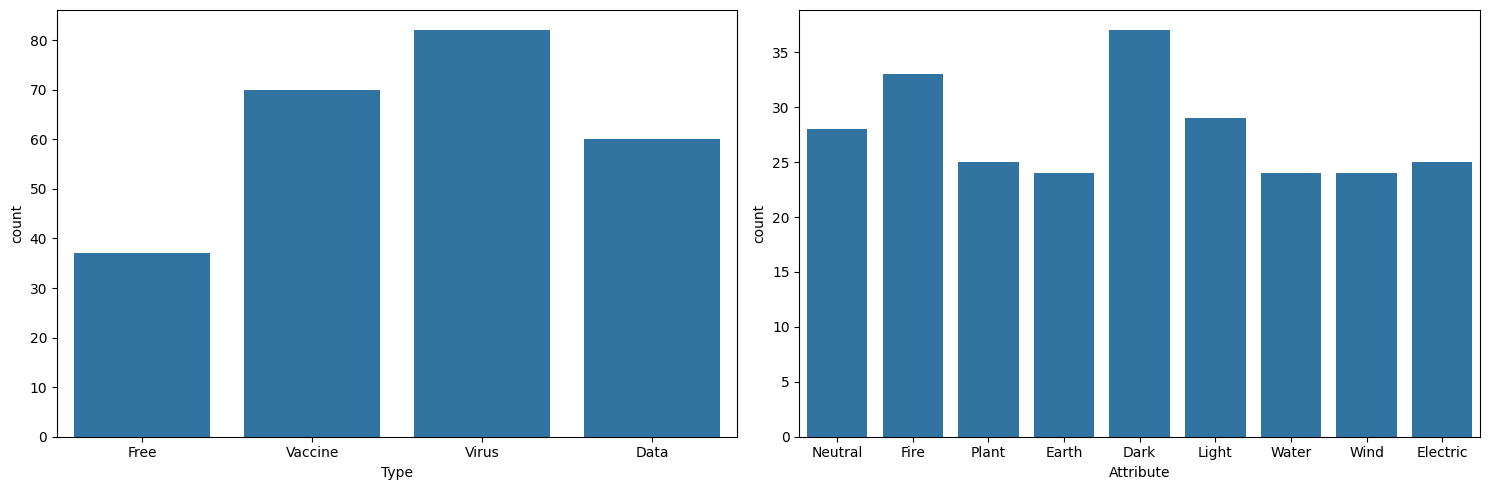

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.countplot(data=digimon, x='Type', ax=ax[0])
sns.countplot(data=digimon, x='Attribute', ax=ax[1])
plt.tight_layout()
plt.show()

### e) Stage Distribution

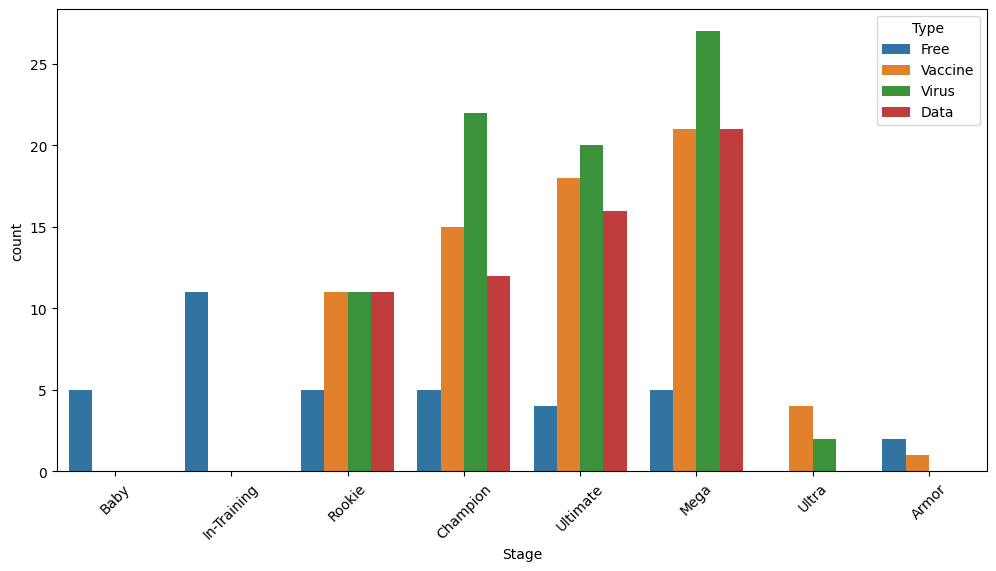

In [8]:
stage_order = ['Baby', 'In-Training', 'Rookie', 'Champion', 'Ultimate', 'Mega', 'Ultra', 'Armor']
plt.figure(figsize=(12,6))
sns.countplot(data=digimon, x='Stage', order=stage_order, hue='Type')
plt.xticks(rotation=45)
plt.show()